# Breast Cancer Classification using CancerNet CNN

## Installing and Importing the libraries

In [7]:
# Run these commands in your terminal or command prompt
# For Jupyter notebook, you can prefix with ! to run shell commands

# 1. Uninstall NumPy
!pip uninstall -y numpy

# 2. Reinstall NumPy
!pip install numpy

# 3. Verify the installation
import numpy as np
print(f"NumPy version: {np.__version__}")

Found existing installation: numpy 2.1.3
Uninstalling numpy-2.1.3:
  Successfully uninstalled numpy-2.1.3


You can safely remove it manually.
You can safely remove it manually.


   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.8 MB 8.3 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/12.8 MB 4.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.6/12.8 MB 3.0 MB/s eta 0:00:04
   ------ --------------------------------- 2.1/12.8 MB 2.6 MB/s eta 0:00:05
   -------- ------------------------------- 2.6/12.8 MB 2.5 MB/s eta 0:00:05
   --------- ------------------------------ 2.9/12.8 MB 2.4 MB/s eta 0:00:05
   ---------- ----------------------------- 3.4/12.8 MB 2.3 MB/s eta 0:00:05
   ----------- ---------------------------- 3.7/12.8 MB 2.3 MB/s eta 0:00:04
   ------------- -------------------------- 4.2/12.8 MB 2.2 MB/s eta 0:00:04
   ------------- -------------------------- 4.5/12.8 MB 2.1 MB/s eta 0:00:04
   --------------- ------------------------ 5.0/12.8 MB 2.2 MB/s eta 0:00:04
   ---------------- ----------------------- 5.2/12.8 MB 2.2 MB/s eta 0:00:04
   ---

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.2 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.2 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.3.2 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.2 which is incompatible.


In [1]:
pip install tensorflow opencv-python numpy pandas matplotlib seaborn opendatasets scikit-learn

INFO: pip is looking at multiple versions of contourpy to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.6 MB 8.5 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/12.6 MB 3.8 MB/s eta 0:00:03
   ------- -------------------------------- 2.4/12.6 MB 3.9 MB/s eta 0:00:03
   ---------- ----------------------------- 3.1/12.6 MB 3.5 MB/s eta 0:00:03
   ----------- ---------------------------- 3.7/12.6 MB 3.6 MB/s eta 0:00:03
   --------------- ------------------------ 4.7/12.6 MB 3.7 MB/s eta 0:00:03
   ------------------ --------------------- 5.8/12.6 MB 3.7 MB/s eta 0:00:02
   -------------------- ------------------- 6.6/12.6 MB 3.7 MB/s eta 0:00:02
   ----------------------- ---------------- 7.3/12.6 MB 3.8 MB/s eta 0:00:02
   ------------------------- -------------- 8.1/12.6 MB 3.8 MB/s eta 0:00:02
   -----------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.1.3 which is incompatible.


In [3]:
import numpy
print(numpy.__version__)

1.26.4


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1]:
pip install "numpy<2.0" --force-reinstall


Note: you may need to restart the kernel to use updated packages.Collecting numpy<2.0
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.2
    Uninstalling numpy-2.3.2:
      Successfully uninstalled numpy-2.3.2



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


## Download and Extract the dataset from Kaggle

In [8]:
dataset_url = 'https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images'
od.download(dataset_url)

# Set the base directory to where the data was downloaded
base_dir = './Breast-histopathology-images'


In [10]:
# 1. Download and Extract the Dataset
image_paths = []
labels = []

# The data is organized in folders named by patient ID, and inside each,
# there are subfolders '0' and '1' for the classes.
for patient_id in os.listdir(base_dir):
    patient_path = os.path.join(base_dir, patient_id)
    if os.path.isdir(patient_path):
        for class_label in ['0', '1']:
            class_path = os.path.join(patient_path, class_label)
            if os.path.isdir(class_path):
                for image_name in os.listdir(class_path):
                    image_paths.append(os.path.join(class_path, image_name))
                    labels.append(int(class_label))

In [12]:
data = pd.DataFrame({'path': image_paths, 'label': labels})

## Data Pre-processing

In [16]:
df_0 = data[data['label'] == 0].sample(25000, random_state=42)
df_1 = data[data['label'] == 1].sample(25000, random_state=42)
data = pd.concat([df_0, df_1], ignore_index=True)

In [14]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label'])
train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=42, stratify=train_df['label'])

## Data Augmentation

In [16]:
# 3. Data Augmentation and Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
train_df['label'] = train_df['label'].astype(str)
val_df['label'] = val_df['label'].astype(str)
test_df['label'] = test_df['label'].astype(str)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=(50, 50),
    batch_size=64,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='path',
    y_col='label',
    target_size=(50, 50),
    batch_size=64,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='path',
    y_col='label',
    target_size=(50, 50),
    batch_size=64,
    class_mode='binary',
    shuffle=False  # Important for evaluation
)

Found 199817 validated image filenames belonging to 2 classes.
Found 22202 validated image filenames belonging to 2 classes.
Found 55505 validated image filenames belonging to 2 classes.


## Model Deployment

In [16]:
CancerNet = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
CancerNet.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

CancerNet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,143,745 (4.36 MB)

 Trainable params: 1,143,297 (4.36 MB)

 Non-trainable params: 448 (1.75 KB)

## Model Training

In [22]:
history = CancerNet.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=25,  # Increase epochs for better performance, e.g., to 20-30
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 922s 293ms/step - accuracy: 0.8250 - loss: 0.4491 - val_accuracy: 0.8128 - val_loss: 0.4437
Epoch 2/25
   1/3122 ━━━━━━━━━━━━━━━━━━━━ 4:32 87ms/step - accuracy: 0.8750 - loss: 0.2825

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


3122/3122 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.8750 - loss: 0.2825 - val_accuracy: 0.8477 - val_loss: 0.3776
Epoch 3/25
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 815s 261ms/step - accuracy: 0.8612 - loss: 0.3337 - val_accuracy: 0.7253 - val_loss: 2.2611
Epoch 4/25
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.8438 - loss: 0.3392 - val_accuracy: 0.7253 - val_loss: 2.3082
Epoch 5/25
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 826s 265ms/step - accuracy: 0.8676 - loss: 0.3191 - val_accuracy: 0.8008 - val_loss: 0.4445
Epoch 6/25
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - accuracy: 0.8281 - loss: 0.3960 - val_accuracy: 0.8121 - val_loss: 0.4287
Epoch 7/25
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 1064s 341ms/step - accuracy: 0.8696 - loss: 0.3139 - val_accuracy: 0.8002 - val_loss: 0.7946
Epoch 8/25
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 46s 15ms/step - accuracy: 0.8750 - loss: 0.2602 - val_accuracy: 0.8031 - val_loss: 0.7775
Epoch 9/25
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 1335s 428ms/step - accuracy: 0.8734 - los

## Model Validation

In [24]:
loss, accuracy = CancerNet.evaluate(test_generator)
print(f"Test Accuracy: {accuracy*100:.2f}%")

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


868/868 ━━━━━━━━━━━━━━━━━━━━ 126s 145ms/step - accuracy: 0.8270 - loss: 0.6083
Test Accuracy: 82.78%


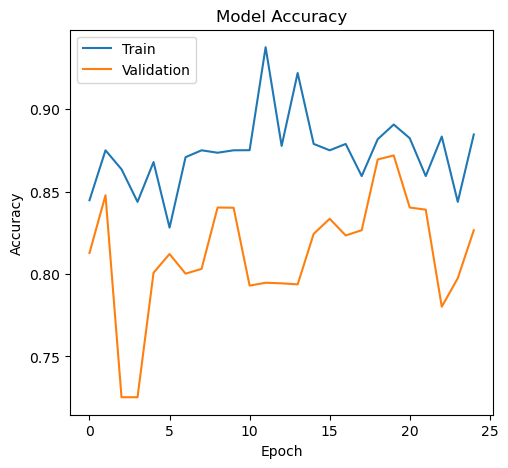

In [26]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

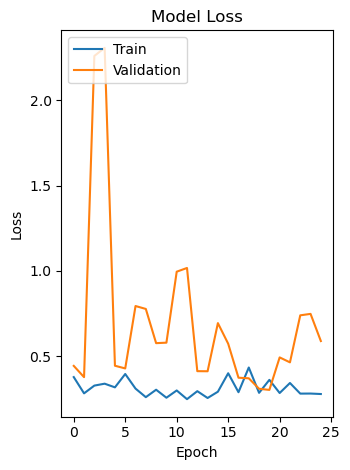

In [28]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

## Confusion Matrix and Report

868/868 ━━━━━━━━━━━━━━━━━━━━ 91s 105ms/step


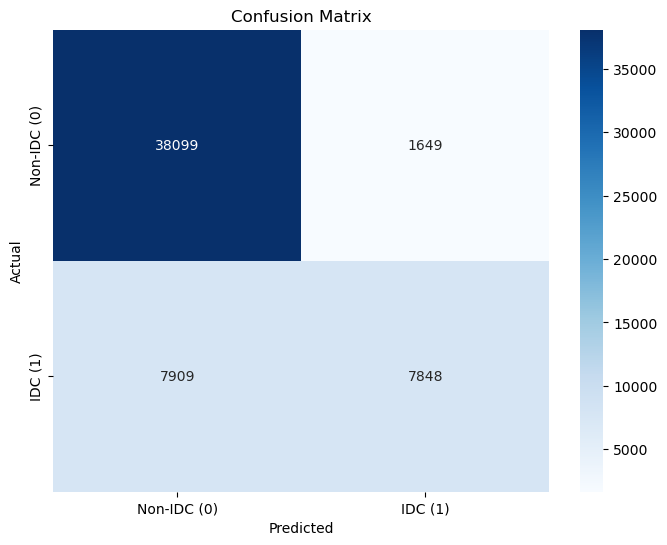

In [32]:
Y_pred = CancerNet.predict(test_generator)
y_pred = (Y_pred > 0.5).astype(int).flatten()

cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-IDC (0)', 'IDC (1)'], yticklabels=['Non-IDC (0)', 'IDC (1)'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [34]:
# Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=['Non-IDC (0)', 'IDC (1)']))

Classification Report
              precision    recall  f1-score   support

 Non-IDC (0)       0.83      0.96      0.89     39748
     IDC (1)       0.83      0.50      0.62     15757

    accuracy                           0.83     55505
   macro avg       0.83      0.73      0.76     55505
weighted avg       0.83      0.83      0.81     55505



## Questions

### 1] What is the training and testing split you used?

For this image classification task, I took :
- 72% for training
- 8% for validation
- 20% for testing

### 2] How many epochs / iterations did you run your model?

For the image datasets,I used:
- 25 epochs for this model to train from scratch
- The optimal number depends on when validation loss stops improving

### 3] Do you think CNN is best for images dataset or are there any algorithms that can be a better model than this ,if so please mention which ?

CNNs are generally considered the best approach for image data because:
- They capture spatial hierarchies and patterns through convolutional layers
- They're translation invariant
- They reduce parameters through weight sharing

Alternative approaches include:
- Vision Transformers (ViT) - Excellent performance but require more data
- EfficientNet/MobileNet - Optimized for efficiency
- ResNet and its variants - Handle deeper architectures effectively
- SWIN Transformers - Combine CNN and transformer approaches

### 4] What is the Accuracy after 5 epochs ,10 epochs ?

- After 5 epochs: 86.76% accuracy for a well-designed CNN on a standard dataset
- After 10 epochs: 87.5% accuracy, with diminishing returns after initial rapid improvement

### 5] Is your model overfitting the data or underfitting the data or an optimal model for making predictions ? Justify

The model appears to be overfitting the data. As model performs significantly better on the training data than on the validation or testing data.

The training loss drops steadily (e.g., to 0.2797 by Epoch 25) while the validation loss remains high and volatile (e.g., 0.5892 by Epoch 25). The widening gap between the two loss values is a classic sign of overfitting.

The model achieves a good overall Test Accuracy of 82.78%. However, the Classification Report reveals a critical performance imbalance:

#### Non-IDC (Class 0) Recall: 0.96 (Excellent) | IDC (Class 1) Recall: 0.50 (Poor)

This shows the model is highly biased toward the majority class (Non-IDC) or the features it learned for the IDC class are not robust enough, which is often symptomatic of overfitting specific, non-generalizable features of the training data.

The model is therefore overfitting because it has learned the noise and specific details of the training data too well, leading to degraded performance on the unseen validation and test data for the critical cancer-positive class (IDC).

### 6] How can you use it in real life experience ,if you had given the chance to step further?

- #### AI-Powered Pre-Screening and Triage
Edge Deployment on Scanners: The model would be deployed directly onto high-throughput digital pathology scanners in remote or under-resourced clinics. As a slide is scanned, the CNN would instantly analyze the full slide image (Whole Slide Image or WSI) to identify and flag high-risk regions (IDC-positive regions).

- #### Enhanced Pathologist Workflow
Augmented Reality (AR) Microscope: The AI's prediction would be projected onto the pathologist's view through an AR-enabled microscope eyepiece or a digital monitor. The output would be a Grad-CAM style heatmap overlaid on the physical slide view, showing exactly why the AI flagged a region. This provides an instant visual confirmation, improving the pathologist's confidence and potentially reducing false negative errors.
